In [1]:
#IMPORT LIBRARIES
import numpy as np
import pandas as pd
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
from pathlib import Path
from dotenv import load_dotenv
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [2]:
np.random.seed(42)

In [3]:
#IMPORT DATA FOLLOWING P1_Q3 FOR THREE SECTORS/STOCKS
#Walmart, P&G, J&J. \\\
# Read the Mapbox API key
from dotenv import load_dotenv
load_dotenv()


alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# api = tradeapi.REST()
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

In [4]:
len(alpaca_api_key)

20

In [5]:
len(alpaca_secret_key)

40

In [6]:
list_of_tickers = ["WMT", "JNJ", "PG","JPM", "MCD","XOM"]
# YOUR CODE HERE
# Get all Asstes
assets = api.list_assets()

# Keep only tradeable assets
tradeable = [asset for asset in assets if asset.tradable ]


In [7]:
# Create a new empty DataFrame
asset_info_df = pd.DataFrame()
asset_info_df['symbol'] = pd.Series([asset.symbol for asset in assets])

# Display the first 10 asset tickers
asset_info_df.sample(5)

,symbol
7566,SPY
5640,DRIP
5032,RBCAA
2766,IDXG
2111,AMTD


In [8]:
tickers = ["WMT", "JNJ", "PG","JPM", "MCD","XOM"]

# Set timeframe to '1D'
timeframe = '1D'

# Set start and end datetimes of 1 year, between now and 365 days ago.
end_date = datetime.now()
start_date = end_date + timedelta(-88)

# Get 1 year's worth of historical data for AAPL
df = api.get_barset(
    tickers,
    timeframe,
    limit=None,
    start=start_date,
    end=end_date,
    after=None,
    until=None,
).df

df.head()

JNJ                                       \
                             open      high       low   close   volume   
time                                                                     
2019-12-23 00:00:00-05:00  145.55  146.7600  145.3401  146.41  3220584   
2019-12-24 00:00:00-05:00  146.00  146.0100  145.2600  145.97  1729932   
2019-12-26 00:00:00-05:00  145.97  146.1827  145.1600  145.83  2233533   
2019-12-27 00:00:00-05:00  146.20  146.5500  145.5400  145.76  1939538   
2019-12-30 00:00:00-05:00  145.78  146.2000  145.0300  145.35  2089996   

                              JPM                                     ...  \
                             open    high       low   close   volume  ...   
time                                                                  ...   
2019-12-23 00:00:00-05:00  137.60  137.91  136.8800  137.22  6163277  ...   
2019-12-24 00:00:00-05:00  137.33  137.63  137.0641  137.58  2824296  ...   
2019-12-26 00:00:00-05:00  137.89  139.10  137.7800  139.09  4753888  ...   
2019-12-27 00:00:00-05:00  139.30  139.77  138.6697  139.14  4864945  ...   
2019-12-30 00:00:00-05:00  139.90  140.08  138.4700  138.68  5571805  ...   

                              WMT                                      XOM  \
                             open    high      low   close   volume   open   
time                                                                         
2019-12-23 00:00:00-05:00  120.20  120.69  119.010  119.03  3489925  69.86   
2019-12-24 00:00:00-05:00  119.13  119.60  119.010  119.52  1991969  70.35   
2019-12-26 00:00:00-05:00  119.61  119.85  118.950  119.55  3062390  70.19   
2019-12-27 00:00:00-05:00  119.94  119.94  119.245  119.57  2557506  70.20   
2019-12-30 00:00:00-05:00  119.80  119.81  119.130  119.42  2373893  70.09   

                                                              
                              high      low  close    volume  
time                                                          
2019-12-23 00:00:00-05:00  70.3000  69.5300  70.29   9421161  
2019-12-24 00:00:00-05:00  70.5000  69.9101  70.02   3650368  
2019-12-26 00:00:00-05:00  70.5000  70.0100  70.13   6831328  
2019-12-27 00:00:00-05:00  70.3123  69.8800  69.89   7459006  
2019-12-30 00:00:00-05:00  70.4350  69.4000  69.48  10463554  

[5 rows x 30 columns]

In [9]:
df.drop(columns=['open', 'high', 'low', 'volume'], level=1, inplace=True)
df.head()

,JNJ,JPM,MCD,PG,WMT,XOM
,close,close,close,close,close,close
time,,,,,,
2019-12-23 00:00:00-05:00,146.41,137.22,196.23,124.91,119.03,70.29
2019-12-24 00:00:00-05:00,145.97,137.58,196.68,125.18,119.52,70.02
2019-12-26 00:00:00-05:00,145.83,139.09,197.16,125.23,119.55,70.13
2019-12-27 00:00:00-05:00,145.76,139.14,198.16,126.07,119.57,69.89
2019-12-30 00:00:00-05:00,145.35,138.68,196.99,124.51,119.42,69.48


In [36]:
# IMPORT DATA SETS
gdp_path = Path("Data_Sets/GDPC1.csv")
gdp_data = pd.read_csv(gdp_path, index_col="DATE", infer_datetime_format=True, parse_dates=True)
gdp_data = gdp_data.sort_index()
gdp_data.columns = ["GDP"]
gdp_data.tail()

,GDP
DATE,
2019-01-01,18927.281
2019-04-01,19021.860
2019-07-01,19121.112
2019-10-01,19221.970
2020-01-01,18987.877


In [39]:
median_home_price_path = Path("Data_Sets/MSPUS.csv")
mhp_data = pd.read_csv(median_home_price_path, index_col="DATE", infer_datetime_format=True, parse_dates=True)
mhp_data = mhp_data.sort_index()
mhp_data.columns=['MEDIAN HOUSE PRICE']
mhp_data.tail()

,MEDIAN HOUSE PRICE
DATE,
2019-01-01,313000.0
2019-04-01,322500.0
2019-07-01,318400.0
2019-10-01,327100.0
2020-01-01,327100.0


In [40]:
unemployment_path = Path("Data_Sets/unemploymentrate.csv")
unempl_data = pd.read_csv(unemployment_path, index_col="DATE", infer_datetime_format=True, parse_dates=True)
unempl_data = unempl_data.sort_index()
unempl_data.columns=["UNEMPLOYMENT RATE"]
unempl_data.tail()

,UNEMPLOYMENT RATE
DATE,
2019-12-01,3.5
2020-01-01,3.6
2020-02-01,3.5
2020-03-01,4.4
2020-04-01,14.7


In [42]:
yield_rate_path = Path("Data_Sets/T10Y2Y.csv")
yield_rate_data = pd.read_csv(yield_rate_path, index_col="DATE", infer_datetime_format=True, parse_dates=True)
yield_rate_data = yield_rate_data.sort_index()
yield_rate_data.columns=["YIELD RATE"]
yield_rate_data.tail()

,YIELD RATE
DATE,
2020-05-06,0.55
2020-05-07,0.5
2020-05-08,0.53
2020-05-11,0.56
2020-05-12,0.52


In [43]:
# Count nulls and cleanse data
gdp_data.isnull().sum()

GDP    0
dtype: int64

In [44]:
unempl_data.isnull().sum()

UNEMPLOYMENT RATE    0
dtype: int64

In [45]:
yield_rate_data.isnull().sum()

YIELD RATE    0
dtype: int64

In [46]:
mhp_data.isnull().sum()

MEDIAN HOUSE PRICE    0
dtype: int64

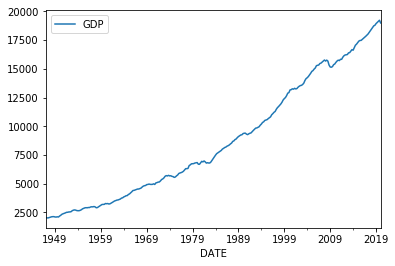

In [47]:
#Plot Line Graph
gdp_data.plot(kind="line")

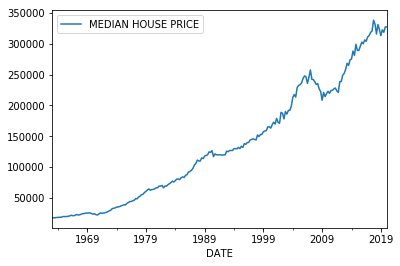

In [48]:
mhp_data.plot(kind="line")

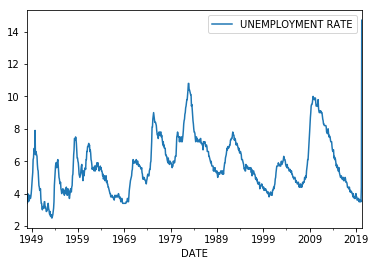

In [49]:
unempl_data.plot(kind="line")

In [50]:
yield_df = yield_rate_data.replace({".":0}).astype(float)

In [51]:
yield_df = yield_df[(yield_df.T != 0).any()]

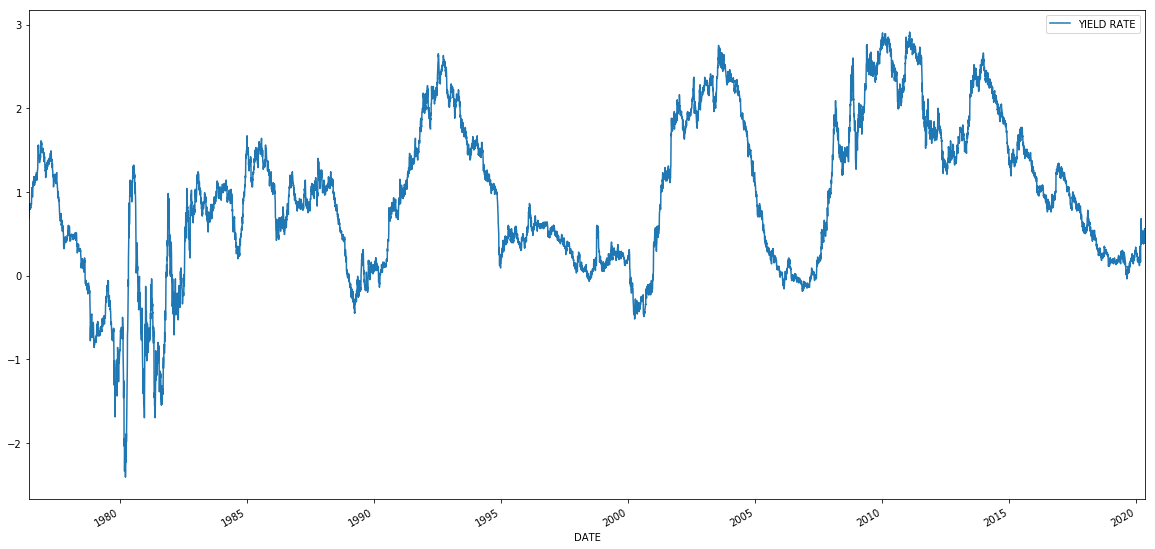

In [52]:
yield_df.plot(kind="line", figsize=(20, 10))

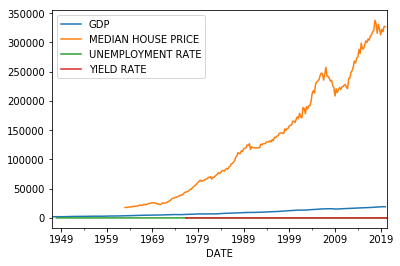

In [53]:
ax = gdp_data.plot(kind="line")
mhp_data.plot(kind="line", ax=ax)
unempl_data.plot(kind="line", ax=ax)
yield_df.plot(ax=ax)

In [54]:
gdp_10year = gdp_data.loc['2008-01-01':'2020-01-01']
house_10year = mhp_data.loc['2008-01-01':'2020-01-01']
ue_10year = unempl_data.loc['2008-01-01':'2020-04-01']
yield_10year = yield_df.loc['2008-01-01':'2020-05-12']

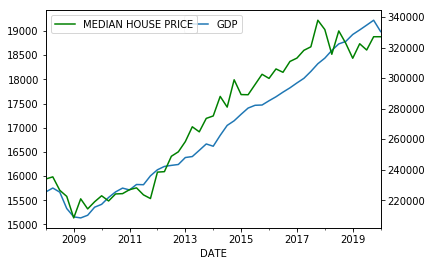

In [100]:
ax = gdp_10year.plot(kind="line")
ax1 = ax.twinx()
ax.legend(loc=9)
house_10year.plot(kind="line", ax=ax1, color = 'g')

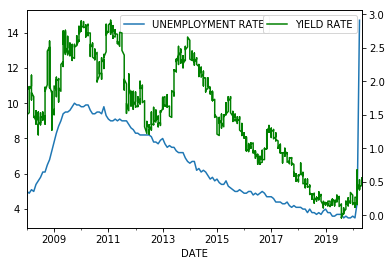

In [99]:
ax = ue_10year.plot(kind="line")
ax3 = ax.twinx()
ax.legend(loc=9)
yield_10year.plot(kind="line", ax=ax3, color = 'g')

In [59]:
snp_path = Path("Data_Sets/SnP500_data.csv")
snp_data = pd.read_csv(snp_path, index_col="Dates", infer_datetime_format=True, parse_dates=True)
snp_data = snp_data.sort_index()
snp_data.columns=["SNP 500"]
snp_data.tail()

,SNP 500
Dates,
2020-05-01,2830.71
2020-05-04,2842.74
2020-05-05,2868.44
2020-05-06,2848.42
2020-05-07,2881.19


In [60]:
snp_2020 = snp_data.loc['2020-01-01':'2020-05-07']
snp_2020.head()

,SNP 500
Dates,
2020-01-02,3257.85
2020-01-03,3234.85
2020-01-06,3246.28
2020-01-07,3237.18
2020-01-08,3253.05


In [61]:
sem_path = Path("Data_Sets/multiTimeline-5.csv")
sem_index = pd.read_csv(sem_path, index_col="Day", infer_datetime_format=True, parse_dates=True)
sem_index = sem_index.sort_index()
sem_index.columns=["Coronaviarus Search Index"]
sem_index.tail()

,Coronaviarus Search Index
Day,
2020-05-08,14
2020-05-09,14
2020-05-10,14
2020-05-11,15
2020-05-12,14


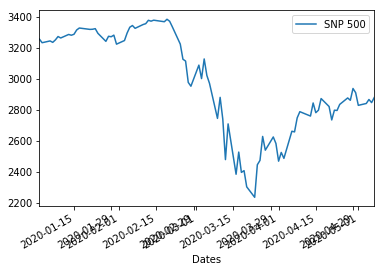

In [62]:
snp_2020.plot(kind="line")

In [64]:
# ax = snp_2020.plot(kind="line")
# ax4 = ax.twinx()
# sem_index.plot(kind="line", ax=ax4 ,color='r')

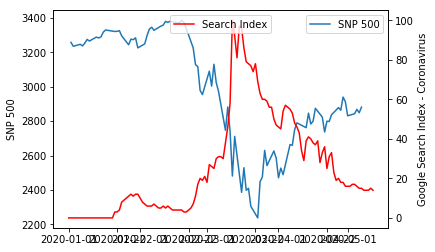

In [98]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(snp_2020, label="SNP 500")
ax2 = ax.twinx()
ax2.plot(sem_index, color='r', label="Search Index")
ax.set_ylabel(r"SNP 500")
ax2.set_ylabel(r"Google Search Index - Coronavirus")
ax.legend(loc=0)
ax2.legend(loc=9)
plt.show()

In [66]:
covid_df = pd.concat([snp_2020, sem_index], axis="columns", join="inner")
covid_df.tail()

,SNP 500,Coronaviarus Search Index
2020-05-01,2830.71,16
2020-05-04,2842.74,17
2020-05-05,2868.44,16
2020-05-06,2848.42,15
2020-05-07,2881.19,15


In [67]:
covid_corr = covid_df.pct_change()

In [68]:
covid_corr.corr()

,SNP 500,Coronaviarus Search Index
SNP 500,1.000000,-0.281018
Coronaviarus Search Index,-0.281018,1.000000


In [69]:
indicators = pd.concat([gdp_10year, house_10year, ue_10year, yield_10year], axis="columns", join="inner")

In [70]:
indictor_corr = indicators.pct_change()
correlation = indictor_corr.corr()
correlation

,GDP,MEDIAN HOUSE PRICE,UNEMPLOYMENT RATE,YIELD RATE
GDP,1.000000,0.503626,-0.715600,-0.525467
MEDIAN HOUSE PRICE,0.503626,1.000000,-0.534303,-0.353457
UNEMPLOYMENT RATE,-0.715600,-0.534303,1.000000,0.312723
YIELD RATE,-0.525467,-0.353457,0.312723,1.000000


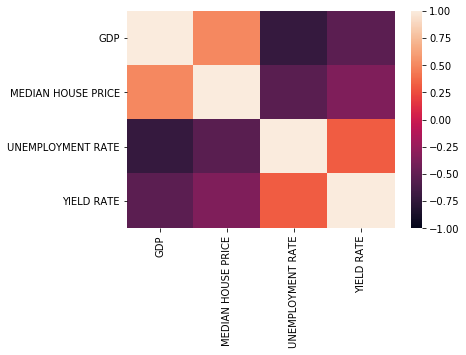

In [71]:
sns.heatmap(correlation, vmin=-1, vmax=1)

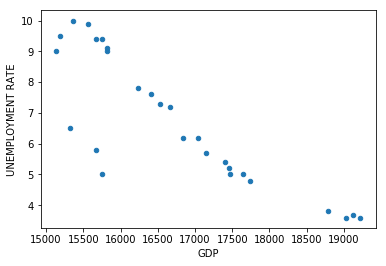

In [72]:
indicators.plot(kind='scatter', x='GDP', y='UNEMPLOYMENT RATE')